In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
from datetime import datetime
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline
sns.set_style('darkgrid')

In [7]:
df = pd.read_csv('/Users/hector/Documents/sea18_ds3/challenges/challenges_data/2013_movies.csv')

In [9]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [10]:
df = df[~df.isnull().any(axis=1)] # removing null Values

In [12]:
#transforming date into month/year
df['Date'] = df['ReleaseDate'].map(lambda x: parser.parse(x))
df['Year'] = df['Date'].map(lambda x: x.year)
df['Month'] = df['Date'].map(lambda x: x.month)

/Users/hector/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/hector/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/hector/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [13]:
# Create your feature matrix X and target y
y, X = patsy.dmatrices('DomesticTotalGross ~ 1', data=df, return_type='dataframe')

In [15]:
# Create model
model = sm.OLS(y, X)
# Fit model to our training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

/Users/hector/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Wed, 31 Jan 2018   Prob (F-statistic):                nan
Time:                        13:30:11   Log-Likelihood:                -1714.4
No. Observations:                  87   AIC:                             3431.
Df Residuals:                      86   BIC:                             3433.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.035e+08   9.43e+06     10.975      0.000    8.48e+07    1.22e+08
==============================================================================
Omnibus:                       47.828   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.528
Skew:                           2.032   Prob(JB):                     1.11e-26
Kurtosis:                       7.058   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Create an empty model
lr = LinearRegression()
# Fit model to the dataset
lr.fit(X, y)
# Print out the R^2 for model
lr.score(X,y)

0.0

In [17]:
# Challenge 2
y, X = patsy.dmatrices('DomesticTotalGross ~ Budget', data=df, return_type='dataframe')

In [18]:
# Create model
model = sm.OLS(y, X)
# Fit model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     33.43
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           1.19e-07
Time:                        13:32:28   Log-Likelihood:                -1700.0
No. Observations:                  87   AIC:                             3404.
Df Residuals:                      85   BIC:                             3409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.443e+07    1.3e+07      3.418      0.001    1.86e+07    7.03e+07
Budget         0.7831      0.135      5.782      0.000       0.514       1.052
==============================================================================
Omnibus:                       38.475   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.671
Skew:                           1.577   Prob(JB):                     7.53e-21
Kurtosis:                       6.952   Cond. No.                     1.55e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Create an empty model
lr = LinearRegression()
# Fit model to the dataset
lr.fit(X, y)
# Print out the R^2 for model
lr.score(X,y)

0.28230037692954857

In [20]:
## challenge 3
rating = patsy.dmatrix('Rating', data=df, return_type='dataframe')
y = df[['DomesticTotalGross']]
X = df[['Budget', 'Runtime']].join(rating)

In [21]:
model = sm.OLS(y, X)
# Fit model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     8.730
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           6.38e-06
Time:                        13:34:26   Log-Likelihood:                -1699.0
No. Observations:                  87   AIC:                             3408.
Df Residuals:                      82   BIC:                             3420.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Budget              0.6957      0.172      4.054      0.000       0.354       1.037
Runtime          6.254e+05   5.33e+05      1.173      0.244   -4.35e+05    1.69e+06
Intercept         3.09e+06   5.29e+07      0.058      0.954   -1.02e+08    1.08e+08
Rating[T.PG-13] -2.747e+07    2.5e+07     -1.097      0.276   -7.73e+07    2.24e+07
Rating[T.R]      -2.59e+07   2.76e+07     -0.939      0.351   -8.08e+07     2.9e+07
==============================================================================
Omnibus:                       35.472   Durbin-Watson:                   0.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.021
Skew:                           1.509   Prob(JB):                     3.11e-17
Kurtosis:                       6.445   Cond. No.                     6.28e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Create an empty model
lr = LinearRegression()
# Fit model to the dataset
lr.fit(X, y)
# Print out the R^2 for model
lr.score(X,y)

0.29867705443266701

In [24]:
#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=444)


In [26]:
# Create model
model = sm.OLS(y_train, X_train)
# Fit model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     8.754
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           1.53e-05
Time:                        13:43:54   Log-Likelihood:                -1173.3
No. Observations:                  60   AIC:                             2357.
Df Residuals:                      55   BIC:                             2367.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Budget              0.8424      0.216      3.895      0.000       0.409       1.276
Runtime          9.628e+05   6.69e+05      1.438      0.156   -3.79e+05     2.3e+06
Intercept       -3.385e+07   6.57e+07     -0.516      0.608   -1.65e+08    9.77e+07
Rating[T.PG-13] -2.898e+07   3.04e+07     -0.952      0.345      -9e+07     3.2e+07
Rating[T.R]      -3.76e+07   3.24e+07     -1.160      0.251   -1.03e+08    2.74e+07
==============================================================================
Omnibus:                       22.156   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.285
Skew:                           1.271   Prob(JB):                     1.32e-08
Kurtosis:                       5.837   Cond. No.                     5.84e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.84e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/hector/anaconda/lib/python3.6/site-packages/pandas/core/indexes/base.py:3033: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


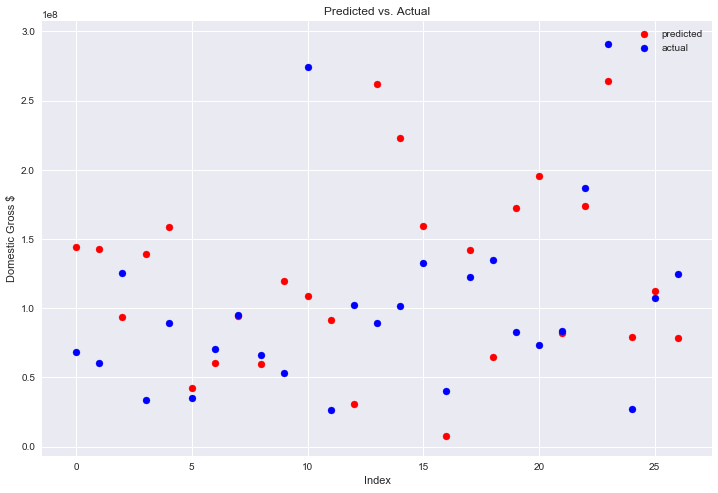

In [27]:
# Plot Actual vs. Predicted
y_pred = fit.predict(X_test)
y_error = y_pred - y_test

fig = plt.figure(figsize=(12, 8))
plt.scatter(np.arange(len(y_pred)), y_pred, color='r', label='predicted')
plt.scatter(np.arange(len(y_test)), y_test.iloc[:, 0], color='b', label='actual')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Domestic Gross $')
plt.title('Predicted vs. Actual')

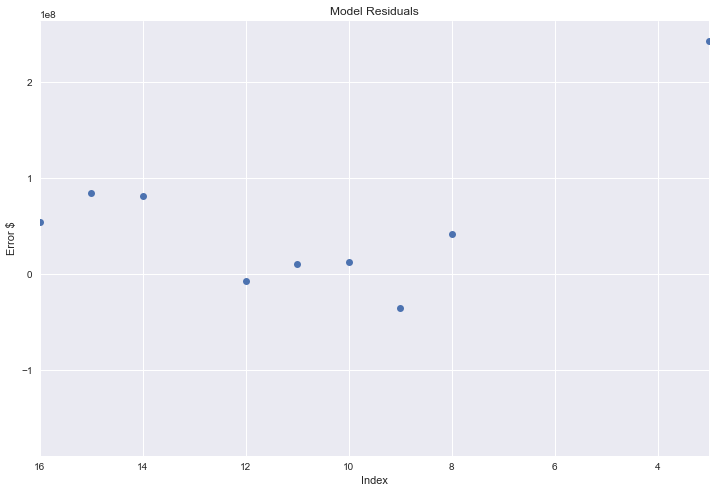

In [30]:
# Plot residuals
fit.resid.plot(style='o', figsize=(12,8));
plt.xlabel('Index')
plt.ylabel('Error $')
plt.title('Model Residuals');